In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chemical/SGG_CSV.csv
/kaggle/input/chemical/CTP_CSV.csv
/kaggle/input/chemical/Chemical.csv


# 데이터 불러오기 단계

In [70]:
df = pd.read_csv('/kaggle/input/chemical/Chemical.csv', sep = '|',error_bad_lines=False)
SGG = pd.read_csv('/kaggle/input/chemical/SGG_CSV.csv', encoding = 'cp949')
CTP = pd.read_csv('/kaggle/input/chemical/CTP_CSV.csv', encoding = 'cp949')

# 데이터 1차 전처리

In [71]:
df.columns = ['year','sn_no','company','CTP','SGG','address','discharge','dsc_unit','reclaim','recl_unit','transport','trans_unit','origin']

In [72]:
SGG.columns = ['SGG_code','SGG_ENG','SGG_temp','CTP_code','CTP']

In [73]:
#SGG에 존재하는 띄어쓰기가 안되어있는 시 - 구 정리.
SET_SGG = []
for x in SGG['SGG_temp'] :
    if len(x) >= 5 :
        if x == '세종특별자치시' :
            SET_SGG.append(x)
        elif ' ' not in x :
            SET_SGG.append(x[:3] + ' ' + x [3:])
        else :
            SET_SGG.append(x)
    else :
        SET_SGG.append(x)

SGG['SGG'] = SET_SGG

In [74]:
#df 중에서 잘못된 놈들 정리과정..
df.loc[df['CTP'] == '세종특별자치시',"SGG"] = '세종특별자치시'
df.loc[(df['CTP'] == '경기도') & (df['SGG'] == '부천시 오정구'), "SGG"] = '부천시'
df.loc[(df['CTP'] == '경기도') & (df['SGG'] == '부천시 원미구'), "SGG"] = '부천시'
df.loc[(df['CTP'] == '경기도') & (df['SGG'] == '안산시'), "SGG"] = '안산시 상록구'
df.loc[(df['CTP'] == '경기도') & (df['SGG'] == '용인시'), "SGG"] = '용인시 처인구'
df.loc[(df['CTP'] == '충청북도') & (df['SGG'] == '청원군'), "SGG"] = '청주시 청원구'
df.loc[(df['CTP'] == '충청남도') & (df['SGG'] == '천안시'), "SGG"] = '천안시 동남구'
df.loc[(df['CTP'] == '충청남도') & (df['SGG'] == '연기군'), "SGG"] = '청주시 청원구'
df.loc[(df['CTP'] == '경상남도') & (df['SGG'] == '창원시'), "SGG"] = '창원시 의창구'
df.loc[(df['CTP'] == '충청남도') & (df['SGG'] == '청주시 청원구'), "CTP"] = '충청북도'
df.loc[(df['CTP'] == '경상남도') & (df['SGG'] == '진해시'), "SGG"] = '창원시 진해구'
df.loc[(df['CTP'] == '경기도') & (df['SGG'] == '화성군'), "SGG"] = '화성시'
df.loc[(df['CTP'] == '경기도') & (df['SGG'] == '부천시 소사구'), "SGG"] = '부천시'
df.loc[(df['CTP'] == '경기도') & (df['SGG'] == '광주광역시'), "SGG"] = '광주시'
df.loc[(df['CTP'] == '경기도') & (df['SGG'] == '광주군'), "SGG"] = '광주시'
df.loc[(df['CTP'] == '경상남도') & (df['SGG'] == '마산시 회원구'), "SGG"] = '창원시 마산회원구'
df.loc[(df['CTP'] == '경상남도') & (df['SGG'] == '마산시'), "SGG"] = '창원시 마산회원구'
df.loc[(df['CTP'] == '충청남도') & (df['SGG'] == '당진군'), "SGG"] = '당진시'
df.loc[(df['CTP'] == '경기도') & (df['SGG'] == '고양시 일산구'), "SGG"] = '고양시 일산서구'
df.loc[(df['CTP'] == '전라북도') & (df['SGG'] == '전주시'), "SGG"] = '전주시 완산구'
df.loc[(df['CTP'] == '경기도') & (df['SGG'] == '고양시 일산구'), "SGG"] = '고양시 일산서구'
df.loc[(df['CTP'] == '제주특별자치도') & (df['SGG'] == '북제주군'), "SGG"] = '제주시'
df.loc[(df['CTP'] == '제주특별자치도') & (df['SGG'] == '남제주군'), "SGG"] = '서귀포시'

In [75]:
#화학물질 배출량 데이터프레임에 시군구 데이터를 넣는다.
SGG_df = pd.merge(left=df, right=SGG, how='left', \
                  on=['CTP','SGG'], sort=False)

In [76]:
#널값확인
SGG_df[SGG_df['SGG_code'].isnull()]

,year,sn_no,company,CTP,SGG,address,discharge,dsc_unit,reclaim,recl_unit,transport,trans_unit,origin,SGG_code,SGG_ENG,SGG_temp,CTP_code


In [77]:
#시군구에 검색기능 코드
SGG[(SGG['SGG'] == '전주시') | (SGG['CTP'] == '제주특별자치도')]

,SGG_code,SGG_ENG,SGG_temp,CTP_code,CTP,SGG
218,50110,Jeju-si,제주시,50,제주특별자치도,제주시
219,50130,Seogwipo-si,서귀포시,50,제주특별자치도,서귀포시


In [78]:
CTP.columns = ['CTP_code','CTP_ENG', 'CTP']

In [79]:
real_df = pd.merge(SGG_df, CTP, left_on = 'CTP', right_on = 'CTP', how = 'left')

In [80]:
data = real_df.loc[:,('year',"SGG", 'SGG_code','CTP','CTP_code_x', 'discharge','reclaim','transport')]
data.head(5)

,year,SGG,SGG_code,CTP,CTP_code_x,discharge,reclaim,transport
0,2001,무안군,46840,전라남도,46,0,0,"43,896"
1,2001,화성시,41590,경기도,41,0,0,"10,497"
2,2001,양산시,48330,경상남도,48,40,0,"13,803"
3,2001,창원시 성산구,48123,경상남도,48,"27,400",0,0
4,2001,청주시 청원구,43114,충청북도,43,"82,929",0,21


# 필요 라이브러리 호출

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import newaxis
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import seaborn as sns

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import TimeDistributed

from sklearn.preprocessing import MinMaxScaler 

import pylab
import os

In [82]:
plt.rcParams["figure.figsize"] = (7.5,5)
plt.style.use('seaborn')

pylab.rc('figure', figsize=(10,7))

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

In [83]:
print('2001년 부터 2017년까지의 데이터 개수는 '+str(len(data.loc[df['year'] == 2001,:]))+', '+str(len(data.loc[df['year'] == 2002,:]))+', '+str(len(data.loc[df['year'] == 2003,:]))+', '+str(len(data.loc[df['year'] == 2004,:]))
      +', '+str(len(data.loc[df['year'] == 2005,:]))+', '+str(len(data.loc[df['year'] == 2006,:]))+', '+str(len(data.loc[df['year'] == 2007,:]))+', '+str(len(data.loc[df['year'] == 2008,:]))+', '+str(len(data.loc[df['year'] == 2009,:]))
      +', '+str(len(data.loc[df['year'] == 2010,:]))+', '+str(len(data.loc[df['year'] == 2011,:]))+', '+str(len(data.loc[df['year'] == 2012,:]))+', '+str(len(data.loc[df['year'] == 2013,:]))+', '+str(len(data.loc[df['year'] == 2014,:]))
      +', '+str(len(data.loc[df['year'] == 2015,:]))+', '+str(len(data.loc[df['year'] == 2016,:]))+', '+str(len(data.loc[df['year'] == 2017,:]))+'개')

2001년 부터 2017년까지의 데이터 개수는 1022, 1197, 1383, 2878, 2741, 2769, 3009, 2945, 2917, 2985, 3159, 3268, 3435, 3524, 3634, 3732, 3798개


# 데이터 2차 전처리

In [84]:
year_data = []
for x in range(len(list(data['year'].value_counts().index))) :
    year_data.append(data.loc[data['year'] == sorted(list(data['year'].value_counts().index))[x]])

In [85]:
#각 연도별로 나눈 화학물질 배출량 데이터를 CTP기준으로 정렬
for x in range(len(year_data)) :
    year_data[x].sort_values('CTP', inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
#CTP 종류별 리스트로 객체선언 - 연도별로 리스트의 수와 종류가 다르기에 연도별로 재정리
CTP_list = []
for x in range(len(year_data)) :
    CTP_list.append(list(year_data[x]['CTP'].unique()))

In [87]:
CTP_list[0]

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '충청남도',
 '충청북도']

In [88]:
def CTP_sum(values_str, want_year) :
    
    CTP_temp = [] #해당 년도 시도별 객체값 넣어주기
    for x in CTP_list[want_year-1] :
        CTP_temp.append(list(year_data[want_year-1].loc[year_data[want_year-1]['CTP'] == x,values_str]))
        
    #year_data['CTP_'+values_str[:3]+'_sum'] = 0 #새로운 컬럼 만들어주기
    temp00 = []
    for x in range(len(CTP_temp)) :   #이중 for문으로 str로 되어있는 숫자 바꿔서 리스트에 넣기.
        temp0 = 0
        for y in CTP_temp[x] :
            temp0 += int(y.replace(',',''))
        temp00.append(temp0)

    for x in range(len(CTP_list[want_year-1])) :
        year_data[want_year-1].loc[(year_data[want_year-1]['CTP'] == CTP_list[want_year-1][x]), 'CTP_'+values_str[:3]+'_sum'] = temp00[x] #year_data에 시도별 배출관련 값의 합이 담긴 컬럼을 생성

In [89]:
for x in range(len(year_data)) :
    CTP_sum('discharge',x)
    CTP_sum('reclaim',x)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [90]:
year_data[0]

,year,SGG,SGG_code,CTP,CTP_code_x,discharge,reclaim,transport,CTP_dis_sum,CTP_rec_sum
909,2001,홍천군,42720,강원도,42,0,0,0,9620.0,0.0
22,2001,원주시,42130,강원도,42,"3,369",0,0,9620.0,0.0
619,2001,원주시,42130,강원도,42,211,0,0,9620.0,0.0
779,2001,원주시,42130,강원도,42,"6,040",0,"226,123",9620.0,0.0
666,2001,시흥시,41390,경기도,41,0,0,0,2883999.0,19464.0
...,...,...,...,...,...,...,...,...,...,...
257,2001,괴산군,43760,충청북도,43,"7,505",0,"185,695",2264983.0,1257.0
470,2001,청주시 청원구,43114,충청북도,43,"1,331",0,0,2264983.0,1257.0
711,2001,청주시 청원구,43114,충청북도,43,67,0,0,2264983.0,1257.0
83,2001,괴산군,43760,충청북도,43,"3,871",0,"4,716",2264983.0,1257.0


In [91]:
CTP_2001 = pd.DataFrame()
CTP_2002 = pd.DataFrame()
CTP_2003 = pd.DataFrame()
CTP_2004 = pd.DataFrame()
CTP_2005 = pd.DataFrame()
CTP_2006 = pd.DataFrame()
CTP_2007 = pd.DataFrame()
CTP_2008 = pd.DataFrame()
CTP_2009 = pd.DataFrame()
CTP_2010 = pd.DataFrame()
CTP_2011 = pd.DataFrame()
CTP_2012 = pd.DataFrame()
CTP_2013 = pd.DataFrame()
CTP_2014 = pd.DataFrame()
CTP_2015 = pd.DataFrame()
CTP_2016 = pd.DataFrame()
CTP_2017 = pd.DataFrame()
CTP_set = []
CTP_set.append(CTP_2001)
CTP_set.append(CTP_2002)
CTP_set.append(CTP_2003)
CTP_set.append(CTP_2004)
CTP_set.append(CTP_2005)
CTP_set.append(CTP_2006)
CTP_set.append(CTP_2007)
CTP_set.append(CTP_2008)
CTP_set.append(CTP_2009)
CTP_set.append(CTP_2010)
CTP_set.append(CTP_2011)
CTP_set.append(CTP_2012)
CTP_set.append(CTP_2013)
CTP_set.append(CTP_2014)
CTP_set.append(CTP_2015)
CTP_set.append(CTP_2016)
CTP_set.append(CTP_2017)

# 데이터셋 편집 및 시각화

In [92]:
def make_CTP_20xx(want_year) :
    temptemp=[]
    for x in CTP_list[want_year-1] :
        temptemp.append(list(year_data[want_year-1].loc[(year_data[want_year-1]['CTP'] == x), 'year'])[0])
    CTP_set[want_year-1]['year'] = temptemp
    
    temptemp=[]
    for x in CTP_list[want_year-1] :
        temptemp.append(list(year_data[want_year-1].loc[(year_data[want_year-1]['CTP'] == x), 'CTP_code_x'])[0])
    CTP_set[want_year-1]['CTP_code'] = temptemp
    
    temptemp=[]
    for x in CTP_list[want_year-1] :
        temptemp.append(list(year_data[want_year-1].loc[(year_data[want_year-1]['CTP'] == x), 'CTP'])[0])
    CTP_set[want_year-1]['CTP'] = temptemp
    
    temptemp=[]
    for x in CTP_list[want_year-1] :
        temptemp.append(list(year_data[want_year-1].loc[(year_data[want_year-1]['CTP'] == x), 'CTP_dis_sum'])[0])
    CTP_set[want_year-1]['dis'] = temptemp
    
    temptemp=[]
    for x in CTP_list[want_year-1] :
        temptemp.append(list(year_data[want_year-1].loc[(year_data[want_year-1]['CTP'] == x), 'CTP_rec_sum'])[0])
    CTP_set[want_year-1]['rec'] = temptemp
    
    CTP_set[want_year-1]['dis_mean'] = round(sum(CTP_set[want_year-1]['dis'])/len(CTP_set[want_year-1]))
    CTP_set[want_year-1]['rec_mean'] = round(sum(CTP_set[want_year-1]['rec'])/len(CTP_set[want_year-1]))

In [93]:
def make_CTP_graph(want_year) :
    fig = pylab.figure(figsize = (30,10))
    plt = fig.add_subplot(121)
    plt2 = fig.add_subplot(122)
    plt.bar(CTP_set[want_year-1].index, CTP_set[want_year-1]['dis'], label = 'discharge')
    plt.plot(CTP_set[want_year-1].index, CTP_set[want_year-1]['dis_mean'], label = 'discharge_mean', color = 'r')
    #plt.title('Discharge and Mean')
    plt.legend()
    plt2.bar(CTP_set[want_year-1].index, CTP_set[want_year-1]['rec'], label = 'reclaim')
    plt2.plot(CTP_set[want_year-1].index, CTP_set[want_year-1]['rec_mean'], label = 'reclaim_mean', color = 'r')
    #plt2.title('SelfReclaim and Mean')
    plt2.legend()

In [94]:
for x in range(0,17) :
    make_CTP_20xx(x+1)

,year,CTP_code,CTP,dis,rec,dis_mean,rec_mean
0,2002,42,강원도,40224.0,0.0,2244274,114
1,2002,41,경기도,3712932.0,871.0,2244274,114
2,2002,48,경상남도,3897876.0,0.0,2244274,114
3,2002,47,경상북도,1712557.0,81.0,2244274,114
4,2002,29,광주광역시,216824.0,0.0,2244274,114
5,2002,27,대구광역시,6833152.0,0.0,2244274,114
6,2002,30,대전광역시,5153.0,0.0,2244274,114
7,2002,26,부산광역시,853216.0,0.0,2244274,114
8,2002,11,서울특별시,1163567.0,0.0,2244274,114
9,2002,31,울산광역시,4808816.0,160.0,2244274,114


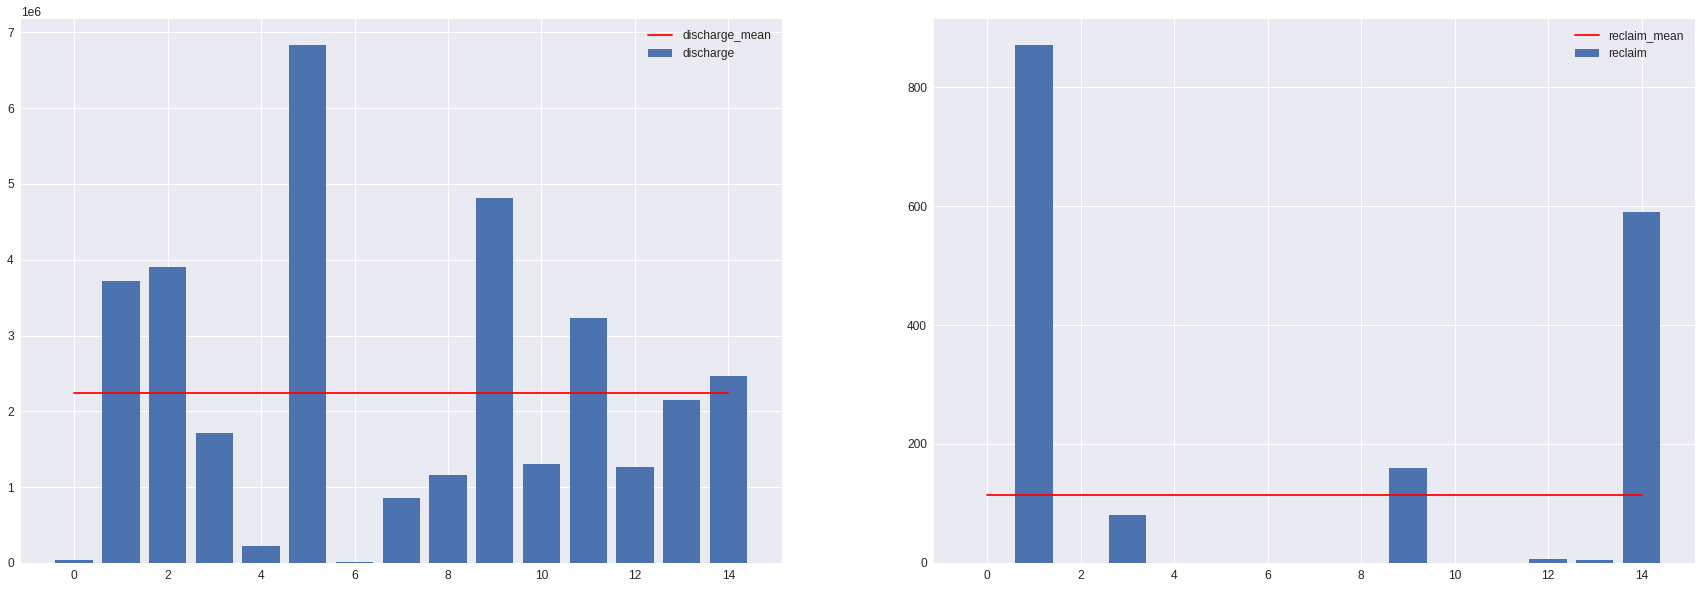

In [95]:
make_CTP_graph(2)
CTP_2002

,year,CTP_code,CTP,dis,rec,dis_mean,rec_mean
0,2010,42,강원도,339634.0,0.0,3132050,0
1,2010,41,경기도,7191673.0,0.0,3132050,0
2,2010,48,경상남도,11592455.0,0.0,3132050,0
3,2010,47,경상북도,3334348.0,0.0,3132050,0
4,2010,29,광주광역시,877007.0,0.0,3132050,0
5,2010,27,대구광역시,1561967.0,0.0,3132050,0
6,2010,30,대전광역시,196698.0,0.0,3132050,0
7,2010,26,부산광역시,2015329.0,0.0,3132050,0
8,2010,11,서울특별시,111137.0,0.0,3132050,0
9,2010,31,울산광역시,7855948.0,0.0,3132050,0


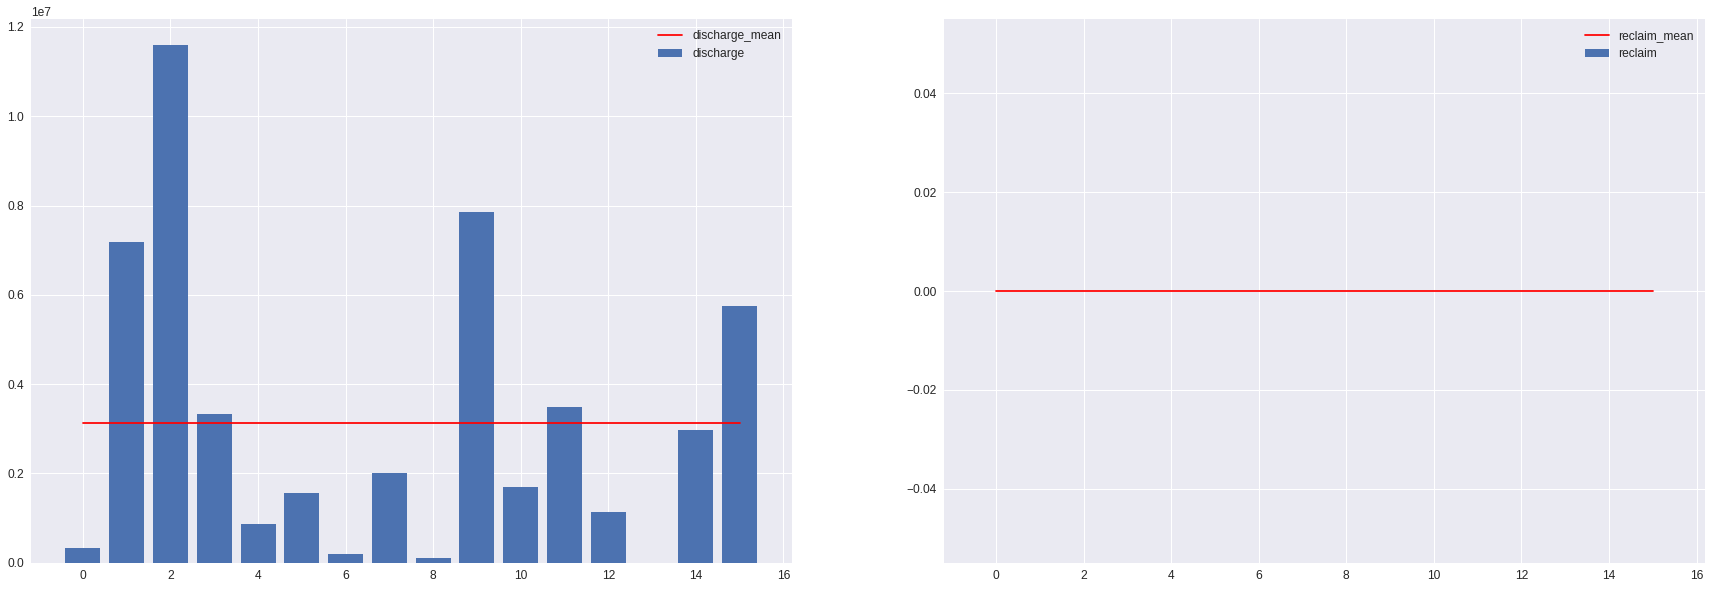

In [96]:
make_CTP_graph(10)
CTP_2010

,year,CTP_code,CTP,dis,rec,dis_mean,rec_mean
0,2017,42,강원도,761242.0,0.0,3307782,0
1,2017,41,경기도,15365674.0,0.0,3307782,0
2,2017,48,경상남도,7306082.0,0.0,3307782,0
3,2017,47,경상북도,2865666.0,0.0,3307782,0
4,2017,29,광주광역시,1455123.0,0.0,3307782,0
5,2017,27,대구광역시,1591076.0,0.0,3307782,0
6,2017,30,대전광역시,243368.0,0.0,3307782,0
7,2017,26,부산광역시,1802802.0,0.0,3307782,0
8,2017,11,서울특별시,16498.0,0.0,3307782,0
9,2017,36,세종특별자치시,126114.0,0.0,3307782,0


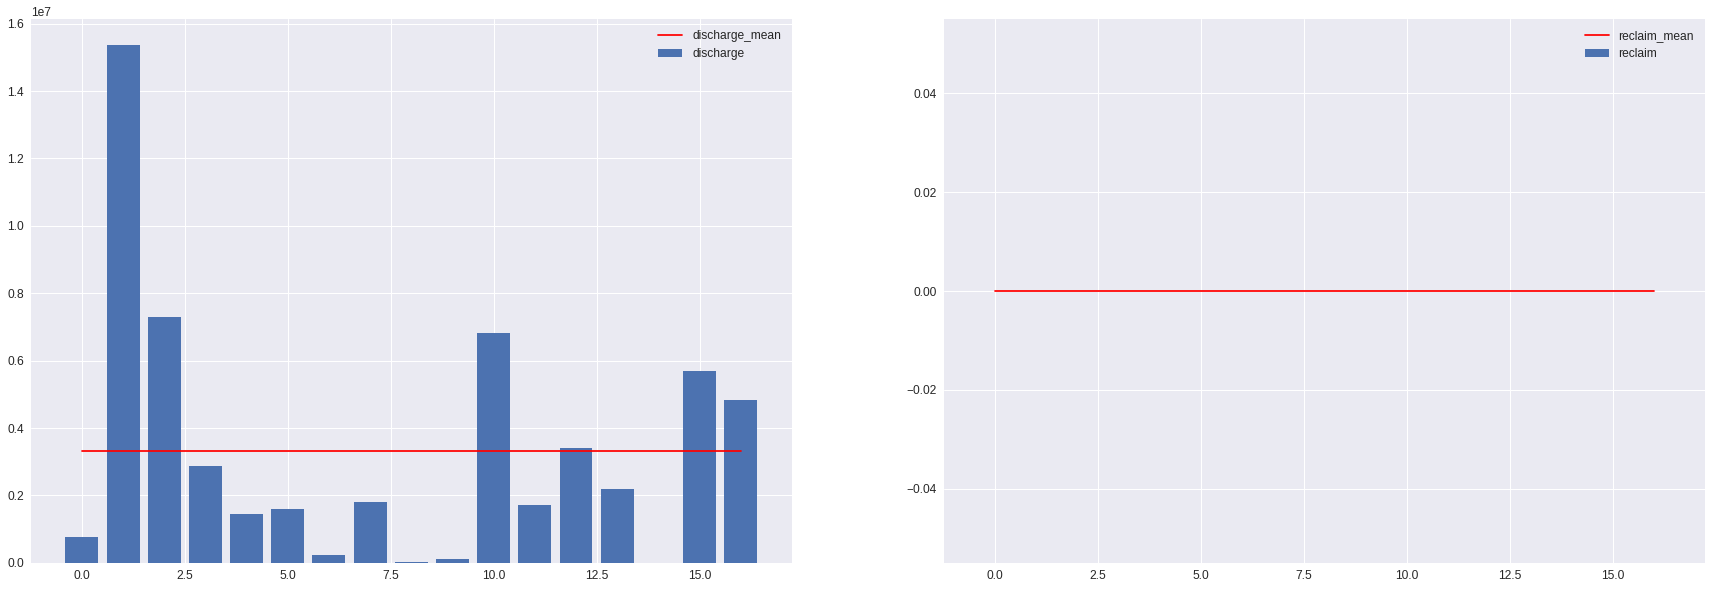

In [97]:
make_CTP_graph(17)
CTP_2017

In [98]:
gangwon = pd.DataFrame(columns = list(CTP_set[0].columns))
gyeonggi = pd.DataFrame(columns = list(CTP_set[0].columns))
gyengsang = pd.DataFrame(columns = list(CTP_set[0].columns))
gyengbuk = pd.DataFrame(columns = list(CTP_set[0].columns))
gwangju = pd.DataFrame(columns = list(CTP_set[0].columns))
daegu = pd.DataFrame(columns = list(CTP_set[0].columns))
daejeon = pd.DataFrame(columns = list(CTP_set[0].columns))
busan = pd.DataFrame(columns = list(CTP_set[0].columns))
seoul = pd.DataFrame(columns = list(CTP_set[0].columns))
saejong = pd.DataFrame(columns = list(CTP_set[0].columns))
ulsan = pd.DataFrame(columns = list(CTP_set[0].columns))
incheon = pd.DataFrame(columns = list(CTP_set[0].columns))
jeonnam = pd.DataFrame(columns = list(CTP_set[0].columns))
jeonbuk = pd.DataFrame(columns = list(CTP_set[0].columns))
jeju = pd.DataFrame(columns = list(CTP_set[0].columns))
chungnam = pd.DataFrame(columns = list(CTP_set[0].columns))
chungbuk = pd.DataFrame(columns = list(CTP_set[0].columns))

annually_CTP = []
annually_CTP.append(gangwon)
annually_CTP.append(gyeonggi)
annually_CTP.append(gyengsang)
annually_CTP.append(gyengbuk)
annually_CTP.append(gwangju)
annually_CTP.append(daegu)
annually_CTP.append(daejeon)
annually_CTP.append(busan)
annually_CTP.append(seoul)
annually_CTP.append(saejong)
annually_CTP.append(ulsan)
annually_CTP.append(incheon)
annually_CTP.append(jeonnam)
annually_CTP.append(jeonbuk)
annually_CTP.append(jeju)
annually_CTP.append(chungnam)
annually_CTP.append(chungbuk)

In [99]:
CTP_facies = list(CTP_set[16]['CTP'])

In [100]:
for y in range(17) :
    for x in range(len(CTP_set)) :
        annually_CTP[y] = pd.concat([annually_CTP[y],pd.DataFrame(CTP_set[x].loc[CTP_set[x]['CTP'] == CTP_facies[y], :])],ignore_index = True)

In [101]:
list(annually_CTP[16]['CTP'].unique())[0]

'충청북도'

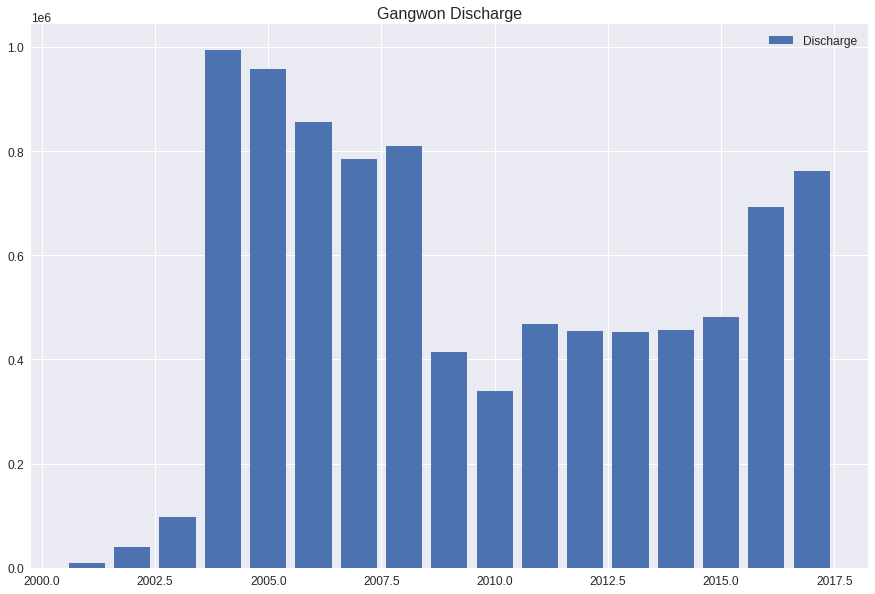

In [102]:
plt.figure(figsize=(15,10))
plt.bar(annually_CTP[0]['year'], annually_CTP[0]['dis'], label = 'Discharge')
plt.title('Gangwon Discharge')
plt.legend()

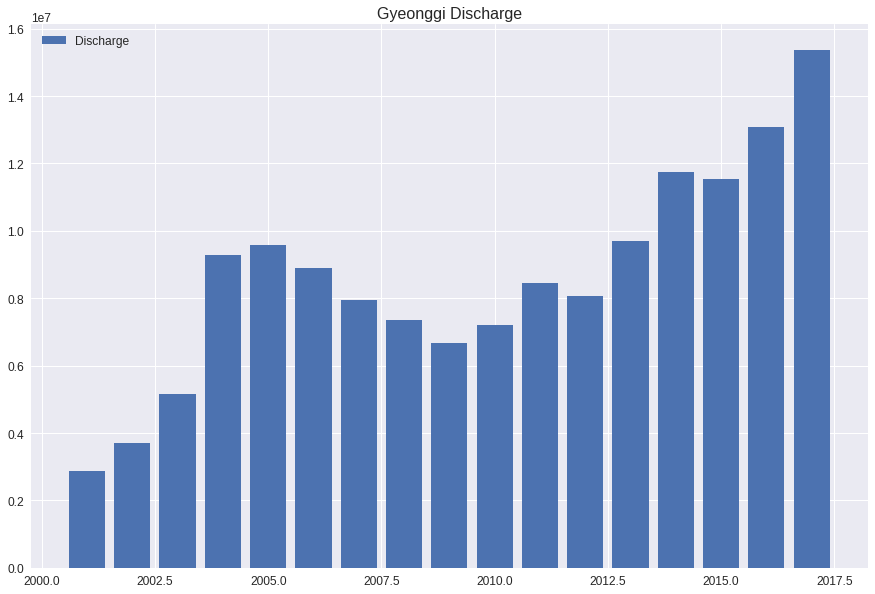

In [103]:
plt.figure(figsize=(15,10))
plt.bar(annually_CTP[1]['year'], annually_CTP[1]['dis'], label = 'Discharge')
plt.title('Gyeonggi Discharge')
plt.legend()

In [104]:
CTP_2017

,year,CTP_code,CTP,dis,rec,dis_mean,rec_mean
0,2017,42,강원도,761242.0,0.0,3307782,0
1,2017,41,경기도,15365674.0,0.0,3307782,0
2,2017,48,경상남도,7306082.0,0.0,3307782,0
3,2017,47,경상북도,2865666.0,0.0,3307782,0
4,2017,29,광주광역시,1455123.0,0.0,3307782,0
5,2017,27,대구광역시,1591076.0,0.0,3307782,0
6,2017,30,대전광역시,243368.0,0.0,3307782,0
7,2017,26,부산광역시,1802802.0,0.0,3307782,0
8,2017,11,서울특별시,16498.0,0.0,3307782,0
9,2017,36,세종특별자치시,126114.0,0.0,3307782,0


In [105]:
"""
for x in range(len(CTP_set)) :
    CTP_set[x].to_excel("CTP_{}".format(x+1)+".xlsx")

for x in range(len(annually_CTP)) :
    annually_CTP[x].to_excel("CTP_{}".format(list(annually_CTP[x]['CTP'].unique())[0])+".xlsx")
    """

'\nfor x in range(len(CTP_set)) :\n    CTP_set[x].to_excel("CTP_{}".format(x+1)+".xlsx")\n\nfor x in range(len(annually_CTP)) :\n    annually_CTP[x].to_excel("CTP_{}".format(list(annually_CTP[x][\'CTP\'].unique())[0])+".xlsx")\n    '

In [106]:
annually_CTP[1]

,year,CTP_code,CTP,dis,rec,dis_mean,rec_mean
0,2001,41,경기도,2883999.0,19464.0,2431064,109080
1,2002,41,경기도,3712932.0,871.0,2244274,114
2,2003,41,경기도,5157856.0,5565.0,2507271,458
3,2004,41,경기도,9292185.0,112.0,3171974,19
4,2005,41,경기도,9573040.0,201.0,2959500,17
5,2006,41,경기도,8912835.0,3.0,2993327,2
6,2007,41,경기도,7957361.0,14.0,2980101,1
7,2008,41,경기도,7345233.0,0.0,2976115,0
8,2009,41,경기도,6669501.0,0.0,2940759,0
9,2010,41,경기도,7191673.0,0.0,3132050,0


Text(0, 0.5, 'Counts in Discharge')

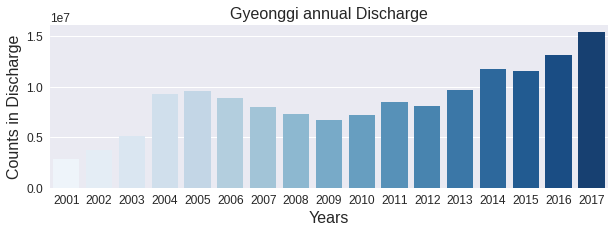

In [107]:
plt.figure(figsize=(10,3))
sns.barplot(x=annually_CTP[1]['year'], y=annually_CTP[1]['dis'], palette="Blues")
plt.title('Gyeonggi annual Discharge')
plt.xlabel('Years')
plt.ylabel("Counts in Discharge")

Text(0, 0.5, 'Counts in Reclaim')

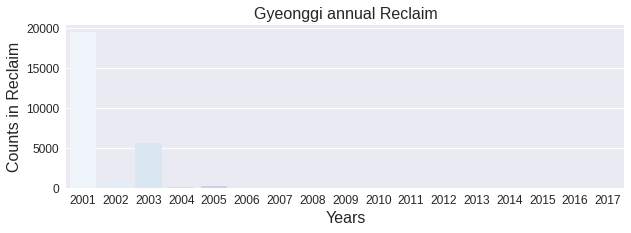

In [108]:
plt.figure(figsize=(10,3))
sns.barplot(x=annually_CTP[1]['year'], y=annually_CTP[1]['rec'], palette="Blues")
plt.title('Gyeonggi annual Reclaim')
plt.xlabel('Years')
plt.ylabel("Counts in Reclaim")

In [109]:
annually_CTP[1].corr()

,dis,rec
dis,1.000000,-0.549074
rec,-0.549074,1.000000


In [110]:
abab = ['gangwon' , 'gyeonggi', 'gyengsang' ,'gyengbuk', 'gwangju', 'daegu', 'daejeon', 'busan', 'seoul','saejong','ulsan','incheon','jeonnam','jeonbuk','jeju','chungnam','chungbuk']

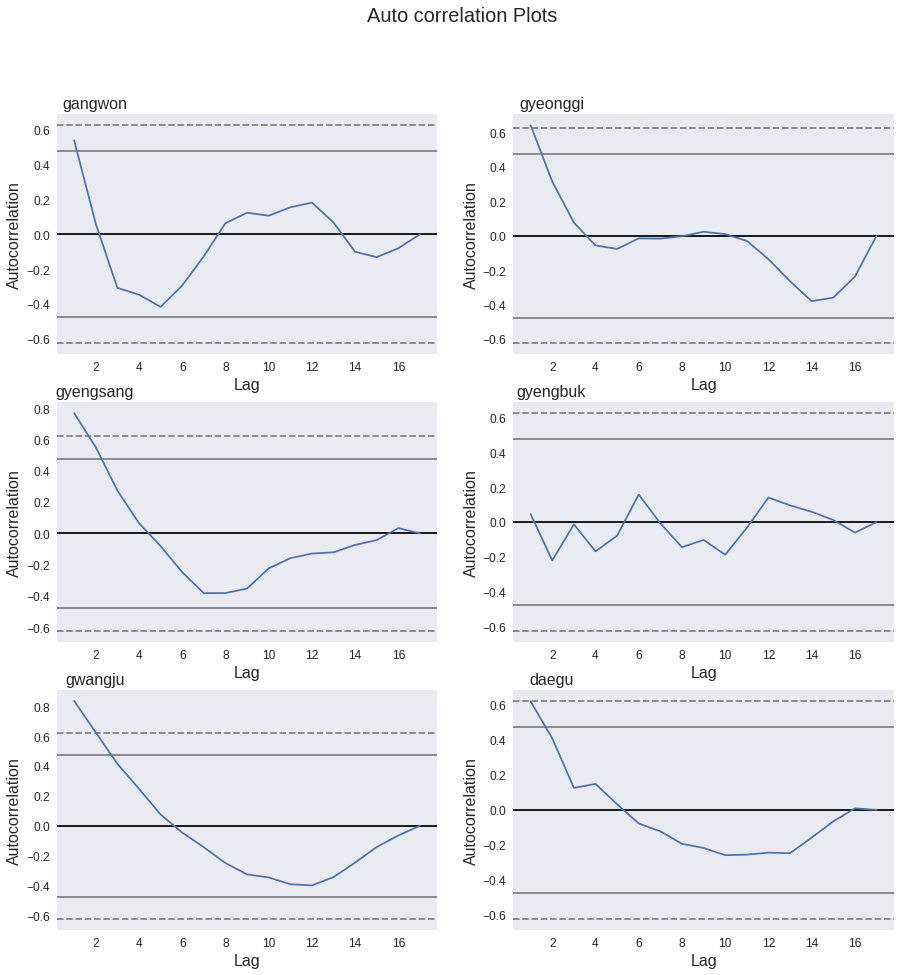

In [111]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(15,15))
pd.plotting.autocorrelation_plot(annually_CTP[0]['dis'],ax=ax[0,0])
pd.plotting.autocorrelation_plot(annually_CTP[1]['dis'],ax=ax[0,1])
pd.plotting.autocorrelation_plot(annually_CTP[2]['dis'],ax=ax[1,0])
pd.plotting.autocorrelation_plot(annually_CTP[3]['dis'],ax=ax[1,1])
pd.plotting.autocorrelation_plot(annually_CTP[4]['dis'],ax=ax[2,0])
pd.plotting.autocorrelation_plot(annually_CTP[5]['dis'],ax=ax[2,1])
fig.suptitle('Auto correlation Plots',fontsize=20)
ax[0,0].set_title(abab[0],X=0.1)
ax[0,1].set_title(abab[1],X=0.1)
ax[1,0].set_title(abab[2],X=0.1)
ax[1,1].set_title(abab[3],X=0.1)
ax[2,0].set_title(abab[4],X=0.1)
ax[2,1].set_title(abab[5],X=0.1)
#plt.rc('axes', titlesize=20)
plt.show()

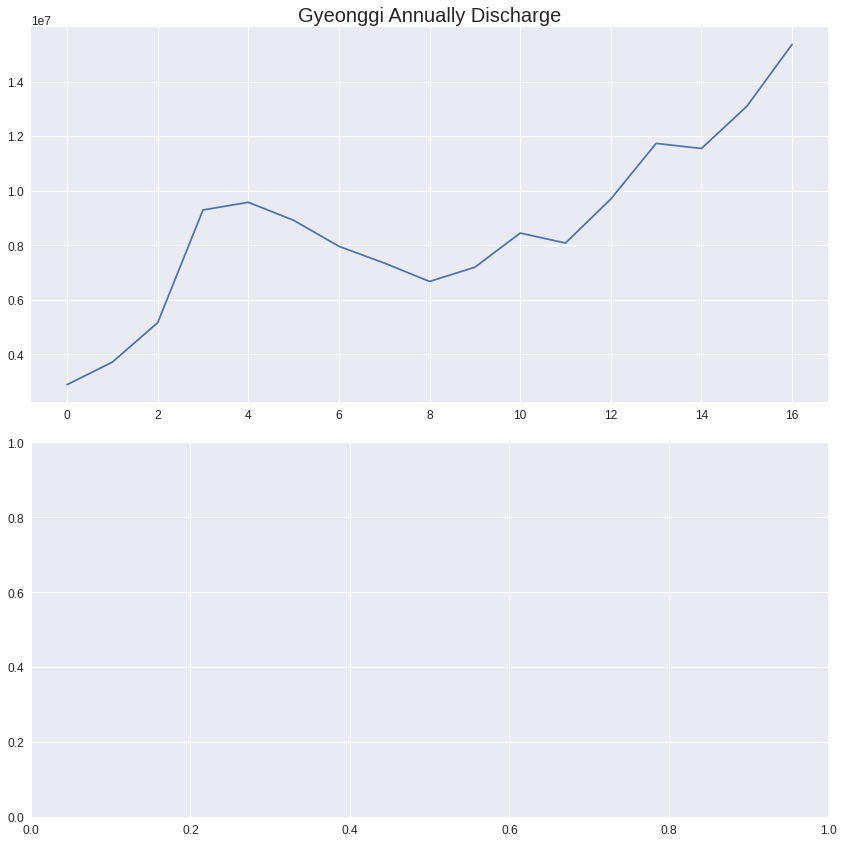

In [112]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(12,12))
annually_CTP[1]['dis'].rolling(window=1).mean().plot(ax=ax[0])
ax[0].set_title('Gyeonggi Annually Discharge',fontsize=20)
plt.tight_layout()

In [113]:
gyeonggi12 = pd.DataFrame(annually_CTP[1]['year'])

In [114]:
gyeonggi12['dis'] = annually_CTP[1]['dis']

In [115]:
gyeonggi12

,year,dis
0,2001,2883999.0
1,2002,3712932.0
2,2003,5157856.0
3,2004,9292185.0
4,2005,9573040.0
5,2006,8912835.0
6,2007,7957361.0
7,2008,7345233.0
8,2009,6669501.0
9,2010,7191673.0


In [118]:
gyeonggi12['dis'] = round(gyeonggi12['dis'] / 100000)

In [119]:
gyeonggi12['year']

,year,dis
0,2001,29.0
1,2002,37.0
2,2003,52.0
3,2004,93.0
4,2005,96.0
5,2006,89.0
6,2007,80.0
7,2008,73.0
8,2009,67.0
9,2010,72.0


In [120]:
#gyeonggi12 = training_data_drop['PM10'].reset_index()
gyeonggi12.columns = ['y','ds']

In [122]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [123]:
Trend_model=Prophet()
Trend_model.fit(gyeonggi12)

future_trend=Trend_model.make_future_dataframe(periods=20)
Trend_predict=Trend_model.predict(future_trend)

MemoryError: Unable to allocate 1.18 PiB for an array with shape (165888015824805,) and data type float64

In [ ]:
fig1=Trend_model.plot(Trend_predict,figsize=(12,7.5))
plt.title('Trend of Discharge',fontsize=20)
plt.ylabel('Discharge')
plt.xlabel('Years')